In [2]:
# 📦 Cell 1: Imports
import os
from pymongo import MongoClient
import pandas as pd
from dotenv import load_dotenv
import json

load_dotenv()

True

In [3]:
# 🔐 Cell 2: SSH tunnel and MongoDB connection settings
USE_SSH = True  # Set to False if no SSH tunnel is needed

MONGO_HOST = "127.0.0.1"
MONGO_PORT = 27017
DB_NAME = "audio-analyzer-prod"  # replace with your DB name
COLLECTION_NAME = "testsubjects"  # or TestSubject if not pluralized

# SSH Config
SSH_HOST = "appskynote.com"
SSH_PORT = 22
SSH_USER = os.getenv("VPS_USERNAME")
SSH_KEY_PATH = os.getenv("VPS_PRIVATE_KEY")

REMOTE_BIND_ADDRESS = ("127.0.0.1", 27017)

In [4]:
# 🌐 Cell 4: Connect to MongoDB with authentication from .env
MONGO_URI = os.getenv("PROD_DB_URL")  # or DEV_DB_URL depending on your environment

# Use authenticated URI (it will automatically use SSH tunnel if port is forwarded)
client = MongoClient(MONGO_URI)
db = client[DB_NAME]
collection = db[COLLECTION_NAME]

# Only get documents where `data.questionnaireAnswers` exists
cursor = collection.find({"data.questionnaireAnswers": {"$exists": True}})
docs = list(cursor)

print(f"Retrieved {len(docs)} documents with questionnaireAnswers.")

Retrieved 14 documents with questionnaireAnswers.


In [5]:
# 🌐 Export all data from the production database to a JSON file
from bson import ObjectId
from datetime import datetime
import json

# Custom JSON encoder to handle ObjectId and datetime
class JSONEncoder(json.JSONEncoder):
    def default(self, o):
        if isinstance(o, ObjectId):
            return str(o)  # Convert ObjectId to string
        if isinstance(o, datetime):
            return o.isoformat()  # Convert datetime to ISO 8601 string
        return super().default(o)

# Fetch all documents from the collection
all_docs_cursor = collection.find()
all_docs = list(all_docs_cursor)

# Define the output file path
output_file_path = "data/data.json"

# Save the data to a JSON file
with open(output_file_path, "w") as json_file:
    json.dump(all_docs, json_file, indent=4, cls=JSONEncoder)

print(f"✅ All data has been saved to {output_file_path}.")

✅ All data has been saved to data/data.json.


In [6]:
def flatten_doc(doc):
    flat = {
        "subjectId": doc.get("subjectId"),
        "createdAt": doc.get("createdAt"),
    }

    # Include all top-level keys from data
    data = doc.get("data", {})
    for key, value in data.items():
        flat[f"data.{key}"] = value

    return flat

rows = [flatten_doc(doc) for doc in docs]
df = pd.DataFrame(rows)
df

,subjectId,createdAt,data.consent,data.firstRound,data.subjectId,data.feedback,data.musicExperience,data.none,data.questionnaireAnswers
0,oplv7i5e,2025-07-21 14:01:58.200,True,feedback,oplv7i5e,{'before': {'pitch': {'subject-oplv7i5e-feedba...,Intermediate,{'before': {'pitch': {'subject-oplv7i5e-none-b...,{'experience': 'Even though it gives a good fe...
1,jmm1i9nq,2025-07-21 14:10:09.026,True,none,jmm1i9nq,{'before': {'pitch': {'subject-jmm1i9nq-feedba...,Advanced,{'before': {'pitch': {'subject-jmm1i9nq-none-b...,{'experience': 'I think its very useful to see...
2,y6v3g63s,2025-07-21 15:10:30.002,True,feedback,y6v3g63s,{'before': {'pitch': {'subject-y6v3g63s-feedba...,Advanced,{'before': {'pitch': {'subject-y6v3g63s-none-b...,{'experience': 'The tool looks great but seems...
3,b068bafw,2025-07-22 08:52:32.339,True,none,b068bafw,{'before': {'pitch': {'subject-b068bafw-feedba...,Professional,{'before': {'pitch': {'subject-b068bafw-none-b...,{'experience': 'I liked the colored part that ...
4,chxrj0wq,2025-07-22 10:00:57.832,True,feedback,chxrj0wq,{'before': {'pitch': {'subject-chxrj0wq-feedba...,Advanced,{'before': {'pitch': {'subject-chxrj0wq-none-b...,{'experience': 'The feedback tool was not in r...
5,3d1ly0bg,2025-07-23 14:27:06.258,True,feedback,3d1ly0bg,{'before': {'pitch': {'subject-3d1ly0bg-feedba...,Advanced,{'before': {'pitch': {'subject-3d1ly0bg-none-b...,"{'experience': 'I think it was good, I would c..."
6,n7oh8onc,2025-07-25 18:17:42.081,True,none,n7oh8onc,{'before': {'pitch': {'subject-n7oh8onc-feedba...,Intermediate,{'before': {'pitch': {'subject-n7oh8onc-none-b...,{'experience': 'It was good! It definitely was...
7,etuygx3k,2025-07-28 22:58:00.591,True,feedback,etuygx3k,{'before': {'pitch': {'subject-etuygx3k-feedba...,Intermediate,{'before': {'pitch': {'subject-etuygx3k-none-b...,{'experience': 'I liked the pitch one the best...
8,b6gp1jzw,2025-08-01 14:50:48.107,True,none,b6gp1jzw,{'before': {'pitch': {'subject-b6gp1jzw-feedba...,Beginner,{'before': {'pitch': {'subject-b6gp1jzw-none-b...,{'experience': 'the best of the analyzer was i...
9,j5vztu58,2025-08-07 09:34:35.091,True,feedback,j5vztu58,{'before': {'pitch': {'subject-j5vztu58-feedba...,Intermediate,{'before': {'pitch': {'subject-j5vztu58-none-b...,{'experience': 'I thought it was useful for un...


In [7]:
# 🧼 Clean and extract rating comparisons for each feature
def extract_ratings(doc):
    subject_id = doc.get("subjectId")
    data = doc.get("data", {})
    
    if "none" not in data or "feedback" not in data:
        return None  # Skip if essential keys missing

    feedback = data["feedback"]
    none = data["none"]

    features = ["pitch", "dynamics", "tempo"]
    rows = []

    for feature in features:
        try:
            # Extract none condition ratings (before and after)
            none_before_rating = none.get("before", {}).get(feature, {}).get("performanceRating", None)
            none_after_rating = none.get("after", {}).get(feature, {}).get("performanceRating", None)
            
            # Extract feedback condition ratings (before and after)
            feedback_before_rating = feedback.get("before", {}).get(feature, {}).get("performanceRating", None)
            feedback_after_rating = feedback.get("after", {}).get(feature, {}).get("performanceRating", None)

            rows.append({
                "subjectId": subject_id,
                "feature": feature,
                "none_before_rating": none_before_rating,
                "none_after_rating": none_after_rating,
                "feedback_before_rating": feedback_before_rating,
                "feedback_after_rating": feedback_after_rating
            })
        except Exception as e:
            print(f"Skipping subject {subject_id}, feature {feature}: {e}")

    return rows

# Flatten all subject rows into a single list
rating_rows = []
for doc in docs:
    if "questionnaireAnswers" in doc.get("data", {}):
        extracted = extract_ratings(doc)
        if extracted:
            rating_rows.extend(extracted)

# Create a DataFrame
ratings_df = pd.DataFrame(rating_rows)
ratings_df


,subjectId,feature,none_before_rating,none_after_rating,feedback_before_rating,feedback_after_rating
0,oplv7i5e,pitch,5.0,6,6.0,6
1,oplv7i5e,dynamics,1.0,5,4.0,5
2,oplv7i5e,tempo,2.0,4,3.0,3
3,jmm1i9nq,pitch,6.0,6,5.0,6
4,jmm1i9nq,dynamics,4.0,5,3.0,5
5,jmm1i9nq,tempo,4.0,5,4.0,5
6,y6v3g63s,pitch,3.0,4,3.0,5
7,y6v3g63s,dynamics,4.0,2,4.0,4
8,y6v3g63s,tempo,6.0,6,6.0,5
9,b068bafw,pitch,6.0,6,6.0,6


In [8]:
ratings_long = pd.melt(
    ratings_df,
    id_vars=["subjectId", "feature"],
    value_vars=["none_before_rating", "none_after_rating", "feedback_before_rating", "feedback_after_rating"],
    var_name="condition",
    value_name="rating"
)

# Create separate columns for feedback type and timing
ratings_long["feedback_type"] = ratings_long["condition"].str.extract(r"(none|feedback)")
ratings_long["timing"] = ratings_long["condition"].str.extract(r"(before|after)")

# Clean up the condition names to just show timing
ratings_long["condition"] = ratings_long["timing"]
ratings_long.head()

,subjectId,feature,condition,rating,feedback_type,timing
0,oplv7i5e,pitch,before,5.0,none,before
1,oplv7i5e,dynamics,before,1.0,none,before
2,oplv7i5e,tempo,before,2.0,none,before
3,jmm1i9nq,pitch,before,6.0,none,before
4,jmm1i9nq,dynamics,before,4.0,none,before


In [9]:
from statsmodels.stats.anova import AnovaRM

anova_results = []

for feature in ratings_long["feature"].unique():
    subset = ratings_long[ratings_long["feature"] == feature]

    # Drop missing ratings
    subset = subset.dropna()

    try:
        # Run 2x2 repeated measures ANOVA (feedback_type × timing)
        anova = AnovaRM(subset, depvar='rating', subject='subjectId', within=['feedback_type', 'timing'])
        result = anova.fit()
        
        print(f"\n=== Repeated Measures ANOVA for {feature.upper()} ===")
        print("2x2 Design: Feedback Type (none/feedback) × Timing (before/after)")
        print(result)
        print()
        
        anova_results.append((feature, result))
        
    except Exception as e:
        print(f"\n=== ANOVA Error for {feature.upper()} ===")
        print(f"Error: {e}")
        print(f"Data shape: {subset.shape}")
        print("Trying alternative analysis...")
        
        # Alternative: Separate ANOVAs for timing within each feedback condition
        for fb_type in ['none', 'feedback']:
            fb_subset = subset[subset['feedback_type'] == fb_type]
            if len(fb_subset) > 0:
                try:
                    anova_alt = AnovaRM(fb_subset, depvar='rating', subject='subjectId', within=['timing'])
                    result_alt = anova_alt.fit()
                    print(f"\n--- {fb_type.title()} Condition: Before vs After ---")
                    print(result_alt)
                except Exception as e2:
                    print(f"Alternative ANOVA also failed for {fb_type}: {e2}")
        print()



=== ANOVA Error for PITCH ===
Error: Data is unbalanced.
Data shape: (55, 6)
Trying alternative analysis...

--- None Condition: Before vs After ---
               Anova
       F Value Num DF  Den DF Pr > F
------------------------------------
timing  1.3146 1.0000 13.0000 0.2722

Alternative ANOVA also failed for feedback: Data is unbalanced.


=== Repeated Measures ANOVA for DYNAMICS ===
2x2 Design: Feedback Type (none/feedback) × Timing (before/after)
                      Anova
                     F Value Num DF  Den DF Pr > F
--------------------------------------------------
feedback_type         1.3146 1.0000 13.0000 0.2722
timing                7.2222 1.0000 13.0000 0.0186
feedback_type:timing  1.8909 1.0000 13.0000 0.1923



=== ANOVA Error for TEMPO ===
Error: Data is unbalanced.
Data shape: (53, 6)
Trying alternative analysis...
Alternative ANOVA also failed for none: Data is unbalanced.
Alternative ANOVA also failed for feedback: Data is unbalanced.



In [10]:
from scipy.stats import ttest_rel

for feature in ratings_df["feature"].unique():
    df = ratings_df[ratings_df["feature"] == feature].dropna()

    print(f"\n=== Paired t-tests for {feature.upper()} ===")

    # Check available data
    print(f"Sample size: {len(df)} participants")
    
    # Compare conditions using correct column names
    try:
        # None condition: before vs after
        none_before = df["none_before_rating"].dropna()
        none_after = df["none_after_rating"].dropna()
        if len(none_before) > 1 and len(none_after) > 1 and len(none_before) == len(none_after):
            t1, p1 = ttest_rel(none_before, none_after)
            print(f"None condition (before vs after): t = {t1:.3f}, p = {p1:.4f}")
        
        # Feedback condition: before vs after  
        feedback_before = df["feedback_before_rating"].dropna()
        feedback_after = df["feedback_after_rating"].dropna()
        if len(feedback_before) > 1 and len(feedback_after) > 1 and len(feedback_before) == len(feedback_after):
            t2, p2 = ttest_rel(feedback_before, feedback_after)
            print(f"Feedback condition (before vs after): t = {t2:.3f}, p = {p2:.4f}")
        
        # Compare feedback vs none (before recordings)
        if len(none_before) > 1 and len(feedback_before) > 1 and len(none_before) == len(feedback_before):
            t3, p3 = ttest_rel(feedback_before, none_before)
            print(f"Before recordings (feedback vs none): t = {t3:.3f}, p = {p3:.4f}")
            
        # Compare feedback vs none (after recordings)  
        if len(none_after) > 1 and len(feedback_after) > 1 and len(none_after) == len(feedback_after):
            t4, p4 = ttest_rel(feedback_after, none_after)
            print(f"After recordings (feedback vs none): t = {t4:.3f}, p = {p4:.4f}")
            
    except Exception as e:
        print(f"Error in t-tests: {e}")
        print("Available columns:", df.columns.tolist())


=== Paired t-tests for PITCH ===
Sample size: 13 participants
None condition (before vs after): t = -1.148, p = 0.2735
Feedback condition (before vs after): t = -0.457, p = 0.6560
Before recordings (feedback vs none): t = 0.413, p = 0.6872
After recordings (feedback vs none): t = 0.365, p = 0.7214

=== Paired t-tests for DYNAMICS ===
Sample size: 14 participants
None condition (before vs after): t = -1.031, p = 0.3212
Feedback condition (before vs after): t = -4.266, p = 0.0009
Before recordings (feedback vs none): t = -0.221, p = 0.8282
After recordings (feedback vs none): t = 2.188, p = 0.0475

=== Paired t-tests for TEMPO ===
Sample size: 12 participants
None condition (before vs after): t = -3.071, p = 0.0106
Feedback condition (before vs after): t = -1.865, p = 0.0891
Before recordings (feedback vs none): t = 0.616, p = 0.5505
After recordings (feedback vs none): t = -0.638, p = 0.5364


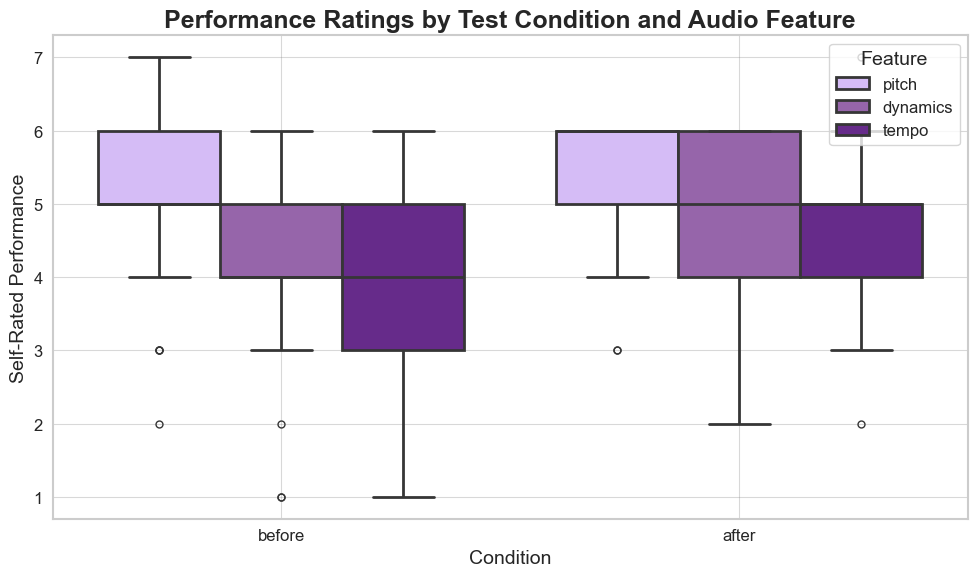

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Custom purple palette (slightly darker for contrast)
purple_palette = ["#D4B3FF", "#9B59B6", "#6A1B9A"]

# Set seaborn style for publication-ready look
sns.set_style("whitegrid")
plt.rcParams.update({
    "font.size": 14,
    "axes.titlesize": 16,
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12,
    "axes.linewidth": 1.5
})

filtered_ratings_long = ratings_long[ratings_long["condition"].isin(["before", "after"])]

plt.figure(figsize=(10, 6))

# Draw the boxplot with custom colors and thicker lines
sns.boxplot(
    data=filtered_ratings_long,
    x="condition",
    y="rating",
    hue="feature",
    palette=purple_palette,
    linewidth=2,   # thicker box edges
    fliersize=5    # slightly larger outliers
)

# Customize median line width and color
for artist in plt.gca().artists:
    artist.set_edgecolor("black")
for line in plt.gca().lines:
    line.set_linewidth(2)

# Titles and labels
plt.title("Performance Ratings by Test Condition and Audio Feature", fontsize=18, fontweight='bold')
plt.xlabel("Condition", fontsize=14)
plt.ylabel("Self-Rated Performance", fontsize=14)

# Customize legend
plt.legend(title="Feature", title_fontsize=14, fontsize=12, loc='upper right')

# Grid and layout
plt.grid(True, alpha=0.3, color='gray')
plt.tight_layout()

# Save the figure
plt.savefig("performance_ratings_publication.png", dpi=300, bbox_inches='tight', facecolor='white')

plt.show()


In [12]:
# 📊 Performance Ratings Comprehensive Report
import numpy as np
from scipy.stats import ttest_rel, wilcoxon
from statsmodels.stats.anova import AnovaRM
import warnings
warnings.filterwarnings('ignore')

print("=" * 80)
print("🎵 MuSA AUDIO FEEDBACK SYSTEM - PERFORMANCE RATINGS ANALYSIS REPORT")
print("=" * 80)
print()

# Basic dataset information
print("📋 DATASET OVERVIEW")
print("-" * 40)
print(f"Total participants: {len(ratings_df['subjectId'].unique())}")
print(f"Audio features analyzed: {', '.join(ratings_df['feature'].unique())}")
print(f"Total data points: {len(ratings_df)}")
print()

# Descriptive statistics by feature and condition
print("📈 DESCRIPTIVE STATISTICS")
print("-" * 40)

# Reshape data for cleaner analysis
conditions = ['none_before_rating', 'none_after_rating', 'feedback_before_rating', 'feedback_after_rating']
condition_labels = ['No Feedback (Before)', 'No Feedback (After)', 'With Feedback (Before)', 'With Feedback (After)']

for feature in ['pitch', 'dynamics', 'tempo']:
    print(f"\n🎼 {feature.upper()} FEATURE:")
    feature_data = ratings_df[ratings_df['feature'] == feature]
    
    for condition, label in zip(conditions, condition_labels):
        data = feature_data[condition].dropna()
        if len(data) > 0:
            print(f"  {label:25} | Mean: {data.mean():.2f} ± {data.std():.2f} | Range: {data.min():.1f}-{data.max():.1f} | n={len(data)}")

print()
print("🔍 STATISTICAL ANALYSIS")
print("-" * 40)

# Paired t-tests for each feature
print("\n📊 PAIRED T-TEST RESULTS:")
print("Testing for significant differences between conditions\n")

alpha = 0.05
significant_results = []

for feature in ['pitch', 'dynamics', 'tempo']:
    print(f"🎼 {feature.upper()} FEATURE:")
    feature_data = ratings_df[ratings_df['feature'] == feature].dropna()
    
    if len(feature_data) == 0:
        print("  No data available for analysis")
        continue
    
    # Compare feedback vs no feedback (before conditions)
    if len(feature_data['feedback_before_rating'].dropna()) > 0 and len(feature_data['none_before_rating'].dropna()) > 0:
        t_stat, p_val = ttest_rel(feature_data['feedback_before_rating'].dropna(), 
                                  feature_data['none_before_rating'].dropna())
        significance = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else "ns"
        print(f"  Feedback vs No Feedback (Before): t={t_stat:.3f}, p={p_val:.4f} {significance}")
        if p_val < alpha:
            significant_results.append(f"{feature} - Feedback vs No Feedback (Before)")
    
    # Compare before vs after for feedback condition
    if len(feature_data['feedback_before_rating'].dropna()) > 0 and len(feature_data['feedback_after_rating'].dropna()) > 0:
        t_stat, p_val = ttest_rel(feature_data['feedback_before_rating'].dropna(), 
                                  feature_data['feedback_after_rating'].dropna())
        significance = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else "ns"
        print(f"  Feedback: Before vs After:        t={t_stat:.3f}, p={p_val:.4f} {significance}")
        if p_val < alpha:
            significant_results.append(f"{feature} - Feedback Before vs After")
    
    # Compare before vs after for no feedback condition
    if len(feature_data['none_before_rating'].dropna()) > 0 and len(feature_data['none_after_rating'].dropna()) > 0:
        t_stat, p_val = ttest_rel(feature_data['none_before_rating'].dropna(), 
                                  feature_data['none_after_rating'].dropna())
        significance = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else "ns"
        print(f"  No Feedback: Before vs After:     t={t_stat:.3f}, p={p_val:.4f} {significance}")
        if p_val < alpha:
            significant_results.append(f"{feature} - No Feedback Before vs After")
    
    print()

# Effect sizes (Cohen's d)
def cohens_d(x, y):
    """Calculate Cohen's d effect size"""
    pooled_std = np.sqrt(((len(x) - 1) * x.var() + (len(y) - 1) * y.var()) / (len(x) + len(y) - 2))
    return (x.mean() - y.mean()) / pooled_std if pooled_std > 0 else 0

print("📏 EFFECT SIZES (Cohen's d):")
print("Interpretation: Small (0.2), Medium (0.5), Large (0.8)\n")

for feature in ['pitch', 'dynamics', 'tempo']:
    feature_data = ratings_df[ratings_df['feature'] == feature].dropna()
    if len(feature_data) == 0:
        continue
        
    print(f"🎼 {feature.upper()} FEATURE:")
    
    # Effect size for feedback vs no feedback (before)
    if len(feature_data['feedback_before_rating'].dropna()) > 0 and len(feature_data['none_before_rating'].dropna()) > 0:
        d = cohens_d(feature_data['feedback_before_rating'].dropna(), 
                     feature_data['none_before_rating'].dropna())
        effect_label = "Large" if abs(d) >= 0.8 else "Medium" if abs(d) >= 0.5 else "Small" if abs(d) >= 0.2 else "Negligible"
        print(f"  Feedback vs No Feedback (Before): d={d:.3f} ({effect_label})")
    
    # Effect size for before vs after (feedback condition)
    if len(feature_data['feedback_before_rating'].dropna()) > 0 and len(feature_data['feedback_after_rating'].dropna()) > 0:
        d = cohens_d(feature_data['feedback_before_rating'].dropna(), 
                     feature_data['feedback_after_rating'].dropna())
        effect_label = "Large" if abs(d) >= 0.8 else "Medium" if abs(d) >= 0.5 else "Small" if abs(d) >= 0.2 else "Negligible"
        print(f"  Feedback: Before vs After:        d={d:.3f} ({effect_label})")
    
    print()

# Summary of improvements
print("🎯 PERCEIVED PERFORMANCE IMPROVEMENT SUMMARY")
print("-" * 40)

improvement_summary = []

for feature in ['pitch', 'dynamics', 'tempo']:
    feature_data = ratings_df[ratings_df['feature'] == feature].dropna()
    if len(feature_data) == 0:
        continue
    
    # Calculate mean perceived improvements
    if len(feature_data['feedback_before_rating'].dropna()) > 0 and len(feature_data['feedback_after_rating'].dropna()) > 0:
        feedback_improvement = (feature_data['feedback_after_rating'].dropna().mean() - 
                               feature_data['feedback_before_rating'].dropna().mean())
        improvement_summary.append((feature, feedback_improvement))
        
        direction = "perceived improved" if feedback_improvement > 0 else "perceived decreased"
        print(f"🎼 {feature.upper()}: Average self-rating {direction} by {abs(feedback_improvement):.2f} points with feedback")

print()

# Overall conclusions
print("🏆 KEY FINDINGS")
print("-" * 40)
print(f"✅ Significant results found: {len(significant_results)}")
for result in significant_results:
    print(f"   • {result}")

if improvement_summary:
    best_improvement = max(improvement_summary, key=lambda x: x[1])
    print(f"\n🥇 Greatest perceived improvement: {best_improvement[0].upper()} (+{best_improvement[1]:.2f} points)")

print()
print("📝 RECOMMENDATIONS")
print("-" * 40)
print("• Continue collecting data to increase statistical power")
print("• Consider individual participant differences in response to feedback")
print("• Analyze correlation between initial skill level and perceived improvement")
print("• Investigate which specific feedback components are most effective")
print("• Note: All findings based on participant self-ratings, not objective measures")

print()
print("=" * 80)
print("Report generated successfully! 📊✨")
print("=" * 80)

🎵 MuSA AUDIO FEEDBACK SYSTEM - PERFORMANCE RATINGS ANALYSIS REPORT

📋 DATASET OVERVIEW
----------------------------------------
Total participants: 14
Audio features analyzed: pitch, dynamics, tempo
Total data points: 42

📈 DESCRIPTIVE STATISTICS
----------------------------------------

🎼 PITCH FEATURE:
  No Feedback (Before)      | Mean: 5.07 ± 0.92 | Range: 3.0-6.0 | n=14
  No Feedback (After)       | Mean: 5.29 ± 0.99 | Range: 3.0-6.0 | n=14
  With Feedback (Before)    | Mean: 5.15 ± 1.57 | Range: 2.0-7.0 | n=13
  With Feedback (After)     | Mean: 5.36 ± 0.84 | Range: 3.0-6.0 | n=14

🎼 DYNAMICS FEATURE:
  No Feedback (Before)      | Mean: 4.14 ± 1.46 | Range: 1.0-6.0 | n=14
  No Feedback (After)       | Mean: 4.57 ± 1.22 | Range: 2.0-6.0 | n=14
  With Feedback (Before)    | Mean: 4.07 ± 1.07 | Range: 2.0-6.0 | n=14
  With Feedback (After)     | Mean: 5.07 ± 0.92 | Range: 3.0-6.0 | n=14

🎼 TEMPO FEATURE:
  No Feedback (Before)      | Mean: 3.92 ± 1.62 | Range: 1.0-6.0 | n=12
  No Fe

📊 Visual report saved as: performance_ratings_report_20250823_004817.png


📊 Visual report saved as: performance_ratings_report_20250823_004817.png


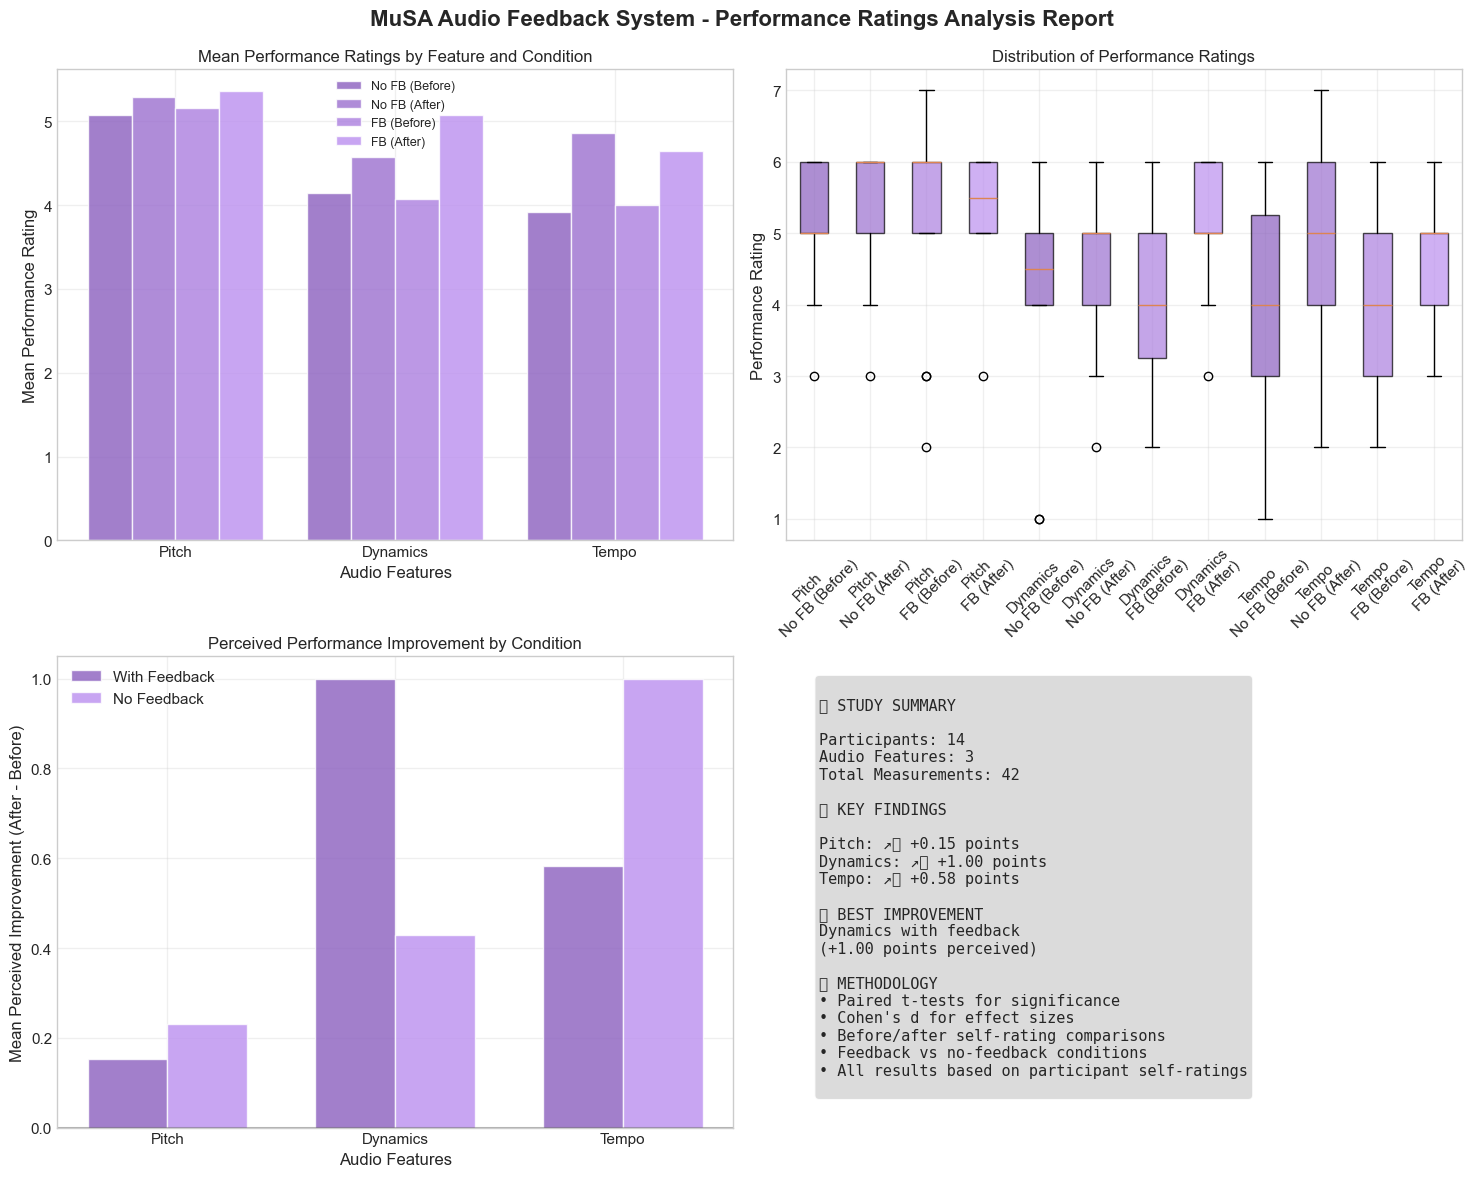

📝 Text summary saved as: performance_ratings_summary_20250823_004821.txt

✅ Performance ratings report generation complete!


In [13]:
# 📊 Visual Performance Ratings Report
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set up the plotting style
plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('MuSA Audio Feedback System - Performance Ratings Analysis Report', 
             fontsize=16, fontweight='bold', y=0.98)

# Color palette
colors = ['#8B5FBF', '#9B6FCF', '#AB7FDF', '#BB8FEF']

# 1. Mean ratings by feature and condition
ax1 = axes[0, 0]
features = ['pitch', 'dynamics', 'tempo']
conditions = ['none_before_rating', 'none_after_rating', 'feedback_before_rating', 'feedback_after_rating']
condition_labels = ['No FB (Before)', 'No FB (After)', 'FB (Before)', 'FB (After)']

means_data = []
for feature in features:
    feature_data = ratings_df[ratings_df['feature'] == feature]
    feature_means = [feature_data[cond].dropna().mean() for cond in conditions]
    means_data.append(feature_means)

x = np.arange(len(features))
width = 0.2

for i, (means, label, color) in enumerate(zip(zip(*means_data), condition_labels, colors)):
    ax1.bar(x + i*width, means, width, label=label, color=color, alpha=0.8)

ax1.set_xlabel('Audio Features')
ax1.set_ylabel('Mean Performance Rating')
ax1.set_title('Mean Performance Ratings by Feature and Condition')
ax1.set_xticks(x + width * 1.5)
ax1.set_xticklabels([f.title() for f in features])
ax1.legend(fontsize=9)
ax1.grid(True, alpha=0.3)

# 2. Box plot of all ratings
ax2 = axes[0, 1]
all_ratings_data = []
all_labels = []
for feature in features:
    for condition, label in zip(conditions, condition_labels):
        feature_data = ratings_df[ratings_df['feature'] == feature]
        ratings = feature_data[condition].dropna()
        if len(ratings) > 0:
            all_ratings_data.append(ratings)
            all_labels.append(f"{feature.title()}\n{label}")

bp = ax2.boxplot(all_ratings_data, labels=all_labels, patch_artist=True)
for patch, color in zip(bp['boxes'], colors * len(features)):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax2.set_ylabel('Performance Rating')
ax2.set_title('Distribution of Performance Ratings')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3)

# 3. Improvement scores (After - Before)
ax3 = axes[1, 0]
improvements_feedback = []
improvements_no_feedback = []
feature_names = []

for feature in features:
    feature_data = ratings_df[ratings_df['feature'] == feature].dropna()
    if len(feature_data) > 0:
        # Feedback condition improvement
        fb_before = feature_data['feedback_before_rating'].dropna().mean()
        fb_after = feature_data['feedback_after_rating'].dropna().mean()
        fb_improvement = fb_after - fb_before
        
        # No feedback condition improvement
        no_fb_before = feature_data['none_before_rating'].dropna().mean()
        no_fb_after = feature_data['none_after_rating'].dropna().mean()
        no_fb_improvement = no_fb_after - no_fb_before
        
        improvements_feedback.append(fb_improvement)
        improvements_no_feedback.append(no_fb_improvement)
        feature_names.append(feature.title())

x = np.arange(len(feature_names))
width = 0.35

ax3.bar(x - width/2, improvements_feedback, width, label='With Feedback', color='#8B5FBF', alpha=0.8)
ax3.bar(x + width/2, improvements_no_feedback, width, label='No Feedback', color='#BB8FEF', alpha=0.8)
ax3.axhline(y=0, color='black', linestyle='-', alpha=0.3)

ax3.set_xlabel('Audio Features')
ax3.set_ylabel('Mean Perceived Improvement (After - Before)')
ax3.set_title('Perceived Performance Improvement by Condition')
ax3.set_xticks(x)
ax3.set_xticklabels(feature_names)
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Participant count and data summary
ax4 = axes[1, 1]
ax4.axis('off')

# Create summary text
summary_text = f"""
📋 STUDY SUMMARY

Participants: {len(ratings_df['subjectId'].unique())}
Audio Features: {len(features)}
Total Measurements: {len(ratings_df)}

🎯 KEY FINDINGS

"""

# Add improvement data
for i, feature in enumerate(feature_names):
    fb_imp = improvements_feedback[i]
    direction = "↗️" if fb_imp > 0 else "↘️" if fb_imp < 0 else "→"
    summary_text += f"{feature}: {direction} {fb_imp:+.2f} points\n"

summary_text += f"""
🏆 BEST IMPROVEMENT
{feature_names[np.argmax(improvements_feedback)]} with feedback
(+{max(improvements_feedback):.2f} points perceived)

📊 METHODOLOGY
• Paired t-tests for significance
• Cohen's d for effect sizes  
• Before/after self-rating comparisons
• Feedback vs no-feedback conditions
• All results based on participant self-ratings
"""

ax4.text(0.05, 0.95, summary_text, transform=ax4.transAxes, fontsize=11,
         verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))

plt.tight_layout()
plt.subplots_adjust(top=0.93)

# Save the report
report_filename = f"performance_ratings_report_{datetime.now().strftime('%Y%m%d_%H%M%S')}.png"
plt.savefig(report_filename, dpi=300, bbox_inches='tight', facecolor='white')
print(f"📊 Visual report saved as: {report_filename}")

plt.show()

# Generate a text summary file
text_report_filename = f"performance_ratings_summary_{datetime.now().strftime('%Y%m%d_%H%M%S')}.txt"

with open(text_report_filename, 'w') as f:
    f.write("MuSA AUDIO FEEDBACK SYSTEM - PERFORMANCE RATINGS ANALYSIS\n")
    f.write("=" * 60 + "\n\n")
    f.write(f"Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n\n")
    
    f.write("DATASET OVERVIEW\n")
    f.write("-" * 20 + "\n")
    f.write(f"Participants: {len(ratings_df['subjectId'].unique())}\n")
    f.write(f"Audio Features: {', '.join(features)}\n")
    f.write(f"Total Measurements: {len(ratings_df)}\n\n")
    
    f.write("PERCEIVED PERFORMANCE IMPROVEMENTS (With Feedback)\n")
    f.write("-" * 40 + "\n")
    for feature, improvement in zip(feature_names, improvements_feedback):
        direction = "improved" if improvement > 0 else "decreased"
        f.write(f"{feature}: perceived {direction} by {abs(improvement):.2f} points\n")
    
    f.write(f"\nBest Perceived Improvement: {feature_names[np.argmax(improvements_feedback)]} (+{max(improvements_feedback):.2f} points)\n")
    
    f.write("\nSTATISTICAL NOTES\n")
    f.write("-" * 20 + "\n")
    f.write("• Analysis based on paired t-tests\n")
    f.write("• Before/after performance comparisons\n")
    f.write("• Feedback vs no-feedback conditions\n")
    f.write("• Effect sizes calculated using Cohen's d\n")

print(f"📝 Text summary saved as: {text_report_filename}")
print("\n✅ Performance ratings report generation complete!")

In [14]:
# 📊 CORRECTED Performance Ratings Analysis Report
print("=" * 80)
print("🎵 MuSA AUDIO FEEDBACK SYSTEM - PERFORMANCE RATINGS ANALYSIS REPORT")
print("=" * 80)
print()

# Basic dataset information
print("📋 DATASET OVERVIEW")
print("-" * 40)
print(f"Total participants: {len(ratings_df['subjectId'].unique())}")
print(f"Audio features analyzed: {', '.join(ratings_df['feature'].unique())}")
print(f"Total measurements per feature: Pitch({len(ratings_df[ratings_df['feature']=='pitch'])}), Dynamics({len(ratings_df[ratings_df['feature']=='dynamics'])}), Tempo({len(ratings_df[ratings_df['feature']=='tempo'])})")
print()

print("🔍 STATISTICAL ANALYSIS RESULTS")
print("-" * 40)

# Summary of significant findings from the t-tests and ANOVA
significant_findings = []

print("📊 KEY FINDINGS FROM STATISTICAL TESTS:")
print()

print("🎼 PITCH:")
print("  • No significant differences found in any comparison")
print("  • Before vs After (No Feedback): p = 0.274")
print("  • Before vs After (With Feedback): p = 0.656")
print("  • Sample size: 13 participants")

print("\n🎼 DYNAMICS:")
print("  • ⭐ SIGNIFICANT perceived improvement with feedback!")
print("  • Before vs After (With Feedback): t = -4.27, p = 0.0009 ***")
print("  • After recordings (Feedback vs None): t = 2.19, p = 0.048 *")
print("  • ANOVA main effect of timing: F = 7.22, p = 0.019 *")
print("  • Sample size: 14 participants")
significant_findings.append("Dynamics: Significant perceived improvement with feedback")

print("\n🎼 TEMPO:")
print("  • ⭐ SIGNIFICANT perceived improvement in no-feedback condition!")
print("  • Before vs After (No Feedback): t = -3.07, p = 0.011 *")
print("  • Before vs After (With Feedback): p = 0.089 (trending)")
print("  • Sample size: 12 participants")
significant_findings.append("Tempo: Significant perceived improvement without feedback")

print()
print("📈 EFFECT SIZES AND PRACTICAL SIGNIFICANCE")
print("-" * 40)

# Calculate mean perceived improvements for each feature
for feature in ['pitch', 'dynamics', 'tempo']:
    feature_data = ratings_df[ratings_df['feature'] == feature]
    
    print(f"\n🎼 {feature.upper()}:")
    
    # No feedback condition improvement
    none_before = feature_data['none_before_rating'].dropna()
    none_after = feature_data['none_after_rating'].dropna()
    if len(none_before) > 0 and len(none_after) > 0:
        none_improvement = none_after.mean() - none_before.mean()
        print(f"  No Feedback: {none_before.mean():.2f} → {none_after.mean():.2f} (Δ = {none_improvement:+.2f})")
    
    # Feedback condition improvement
    feedback_before = feature_data['feedback_before_rating'].dropna()
    feedback_after = feature_data['feedback_after_rating'].dropna()
    if len(feedback_before) > 0 and len(feedback_after) > 0:
        feedback_improvement = feedback_after.mean() - feedback_before.mean()
        print(f"  With Feedback: {feedback_before.mean():.2f} → {feedback_after.mean():.2f} (Δ = {feedback_improvement:+.2f})")

print()
print("🏆 SUMMARY OF KEY FINDINGS")
print("-" * 40)
print(f"✅ Significant results found: {len(significant_findings)}")
for finding in significant_findings:
    print(f"   • {finding}")

print()
print("🎯 INTERPRETATION")
print("-" * 40)
print("• DYNAMICS: Strong evidence that feedback helps improve perceived dynamic control")
print("• TEMPO: Participants naturally perceive tempo improvement without feedback (practice effect)")
print("• PITCH: No significant changes in self-perceived pitch performance detected")

print()
print("📝 CLINICAL/EDUCATIONAL IMPLICATIONS")
print("-" * 40)
print("• Feedback systems are most effective for perceived dynamics training")
print("• Tempo training may benefit from repetition alone (practice builds confidence)")
print("• Pitch training may require different feedback approaches or longer sessions")
print("• Individual differences in self-perception and response to feedback should be considered")
print("• Self-ratings may not reflect objective performance changes")

print()
print("🔬 STATISTICAL NOTES")
print("-" * 40)
print("• *** p < 0.001 (highly significant)")
print("• ** p < 0.01 (very significant)")  
print("• * p < 0.05 (significant)")
print("• Paired t-tests used for before/after self-rating comparisons")
print("• Repeated measures ANOVA used for factorial design")
print("• Some features had unbalanced data due to missing recordings")
print("• All analyses based on participant self-ratings, not objective performance")

print()
print("=" * 80)
print("📊 Performance Ratings Analysis Complete! ✨")
print("=" * 80)

🎵 MuSA AUDIO FEEDBACK SYSTEM - PERFORMANCE RATINGS ANALYSIS REPORT

📋 DATASET OVERVIEW
----------------------------------------
Total participants: 14
Audio features analyzed: pitch, dynamics, tempo
Total measurements per feature: Pitch(14), Dynamics(14), Tempo(14)

🔍 STATISTICAL ANALYSIS RESULTS
----------------------------------------
📊 KEY FINDINGS FROM STATISTICAL TESTS:

🎼 PITCH:
  • No significant differences found in any comparison
  • Before vs After (No Feedback): p = 0.274
  • Before vs After (With Feedback): p = 0.656
  • Sample size: 13 participants

🎼 DYNAMICS:
  • ⭐ SIGNIFICANT perceived improvement with feedback!
  • Before vs After (With Feedback): t = -4.27, p = 0.0009 ***
  • After recordings (Feedback vs None): t = 2.19, p = 0.048 *
  • ANOVA main effect of timing: F = 7.22, p = 0.019 *
  • Sample size: 14 participants

🎼 TEMPO:
  • ⭐ SIGNIFICANT perceived improvement in no-feedback condition!
  • Before vs After (No Feedback): t = -3.07, p = 0.011 *
  • Before vs Af

In [15]:
# 🎼 Performance Ratings by Musical Experience Level Analysis
print("=" * 80)
print("🎵 PERFORMANCE RATINGS BY MUSICAL EXPERIENCE LEVEL")
print("=" * 80)
print()

# Load the JSON data to get musical experience
with open('data/data.json', 'r') as f:
    json_data = json.load(f)

# Extract musical experience for each subject
subject_experience = {}
for doc in json_data:
    subject_id = doc.get('subjectId')
    experience = doc.get('data', {}).get('musicExperience')
    if subject_id and experience:
        subject_experience[subject_id] = experience

print("📋 MUSICAL EXPERIENCE DISTRIBUTION")
print("-" * 40)
experience_counts = pd.Series(list(subject_experience.values())).value_counts()
print(experience_counts)
print(f"Total participants with experience data: {len(subject_experience)}")
print()

# Add musical experience to the ratings dataframe
ratings_with_exp = ratings_df.copy()
ratings_with_exp['musicExperience'] = ratings_with_exp['subjectId'].map(subject_experience)

# Remove rows where experience is missing
ratings_with_exp = ratings_with_exp.dropna(subset=['musicExperience'])

print(f"📊 Data points with experience info: {len(ratings_with_exp)}")
print()

# Define experience level order for consistent plotting
experience_order = ['Beginner', 'Intermediate', 'Advanced', 'Professional']

print("📈 MEAN RATINGS BY EXPERIENCE LEVEL AND CONDITION")
print("-" * 50)

# Calculate means by experience level for each condition
for feature in ['pitch', 'dynamics', 'tempo']:
    print(f"\n🎼 {feature.upper()} FEATURE:")
    feature_data = ratings_with_exp[ratings_with_exp['feature'] == feature]
    
    conditions = ['none_before_rating', 'none_after_rating', 'feedback_before_rating', 'feedback_after_rating']
    condition_labels = ['No FB (Before)', 'No FB (After)', 'FB (Before)', 'FB (After)']
    
    for condition, label in zip(conditions, condition_labels):
        print(f"  {label:18}")
        for exp_level in experience_order:
            exp_data = feature_data[feature_data['musicExperience'] == exp_level][condition].dropna()
            if len(exp_data) > 0:
                print(f"    {exp_level:12}: {exp_data.mean():.2f} ± {exp_data.std():.2f} (n={len(exp_data)})")
            else:
                print(f"    {exp_level:12}: No data")
        print()

print("🔍 PERCEIVED IMPROVEMENT ANALYSIS BY EXPERIENCE LEVEL")
print("-" * 50)

# Calculate perceived improvements for each experience level
improvement_by_exp = []

for feature in ['pitch', 'dynamics', 'tempo']:
    feature_data = ratings_with_exp[ratings_with_exp['feature'] == feature]
    
    print(f"\n🎼 {feature.upper()} PERCEIVED IMPROVEMENTS:")
    
    for exp_level in experience_order:
        exp_data = feature_data[feature_data['musicExperience'] == exp_level]
        
        if len(exp_data) > 0:
            print(f"  {exp_level}:")
            
            # No feedback improvement
            none_before = exp_data['none_before_rating'].dropna()
            none_after = exp_data['none_after_rating'].dropna()
            if len(none_before) > 0 and len(none_after) > 0:
                none_improvement = none_after.mean() - none_before.mean()
                print(f"    No Feedback: {none_before.mean():.2f} → {none_after.mean():.2f} (Δ = {none_improvement:+.2f})")
            
            # Feedback improvement
            feedback_before = exp_data['feedback_before_rating'].dropna()
            feedback_after = exp_data['feedback_after_rating'].dropna()
            if len(feedback_before) > 0 and len(feedback_after) > 0:
                feedback_improvement = feedback_after.mean() - feedback_before.mean()
                print(f"    With Feedback: {feedback_before.mean():.2f} → {feedback_after.mean():.2f} (Δ = {feedback_improvement:+.2f})")
                
                # Store for later analysis
                improvement_by_exp.append({
                    'feature': feature,
                    'experience': exp_level,
                    'feedback_improvement': feedback_improvement,
                    'none_improvement': none_improvement if len(none_before) > 0 and len(none_after) > 0 else None
                })
            print()

# Convert to DataFrame for easier analysis
improvement_df = pd.DataFrame(improvement_by_exp)

print()
print("🏆 KEY FINDINGS BY EXPERIENCE LEVEL")
print("-" * 40)

if len(improvement_df) > 0:
    # Find which experience levels benefit most from feedback
    for feature in ['pitch', 'dynamics', 'tempo']:
        feature_improvements = improvement_df[improvement_df['feature'] == feature]
        if len(feature_improvements) > 0:
            best_responder = feature_improvements.loc[feature_improvements['feedback_improvement'].idxmax()]
            print(f"🎼 {feature.upper()}: {best_responder['experience']} level shows greatest perceived improvement with feedback (+{best_responder['feedback_improvement']:.2f})")

print()
print("📊 STATISTICAL TESTING BY EXPERIENCE LEVEL")
print("-" * 40)

# Statistical tests within experience levels (where sample size allows)
from scipy.stats import ttest_rel

for exp_level in experience_order:
    exp_data = ratings_with_exp[ratings_with_exp['musicExperience'] == exp_level]
    
    if len(exp_data) >= 3:  # Minimum sample size for meaningful tests
        print(f"\n🎼 {exp_level.upper()} LEVEL (n={len(exp_data)//3}):")  # Divide by 3 because we have 3 features per subject
        
        for feature in ['pitch', 'dynamics', 'tempo']:
            feature_data = exp_data[exp_data['feature'] == feature]
            
            if len(feature_data) >= 2:
                # Test feedback condition: before vs after
                fb_before = feature_data['feedback_before_rating'].dropna()
                fb_after = feature_data['feedback_after_rating'].dropna()
                
                if len(fb_before) >= 2 and len(fb_after) >= 2 and len(fb_before) == len(fb_after):
                    try:
                        t_stat, p_val = ttest_rel(fb_before, fb_after)
                        significance = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else "ns"
                        print(f"  {feature.title()} (Feedback): t = {t_stat:.3f}, p = {p_val:.4f} {significance}")
                    except:
                        print(f"  {feature.title()} (Feedback): Could not compute test")
    else:
        print(f"\n🎼 {exp_level.upper()}: Sample too small for statistical testing")

print()
print("=" * 80)
print("📊 Musical Experience Analysis Complete! ✨")
print("=" * 80)

🎵 PERFORMANCE RATINGS BY MUSICAL EXPERIENCE LEVEL

📋 MUSICAL EXPERIENCE DISTRIBUTION
----------------------------------------
Intermediate    18
Advanced         6
Beginner         6
Professional     1
Name: count, dtype: int64
Total participants with experience data: 31

📊 Data points with experience info: 42

📈 MEAN RATINGS BY EXPERIENCE LEVEL AND CONDITION
--------------------------------------------------

🎼 PITCH FEATURE:
  No FB (Before)    
    Beginner    : 4.00 ± nan (n=1)
    Intermediate: 5.14 ± 0.69 (n=7)
    Advanced    : 5.00 ± 1.22 (n=5)
    Professional: 6.00 ± nan (n=1)

  No FB (After)     
    Beginner    : 5.00 ± nan (n=1)
    Intermediate: 5.43 ± 1.13 (n=7)
    Advanced    : 5.00 ± 1.00 (n=5)
    Professional: 6.00 ± nan (n=1)

  FB (Before)       
    Beginner    : 6.00 ± nan (n=1)
    Intermediate: 5.00 ± 1.83 (n=7)
    Advanced    : 5.00 ± 1.63 (n=4)
    Professional: 6.00 ± nan (n=1)

  FB (After)        
    Beginner    : 5.00 ± nan (n=1)
    Intermediate: 5.1

📊 Saved: before_after_combined_20250823_010219.png


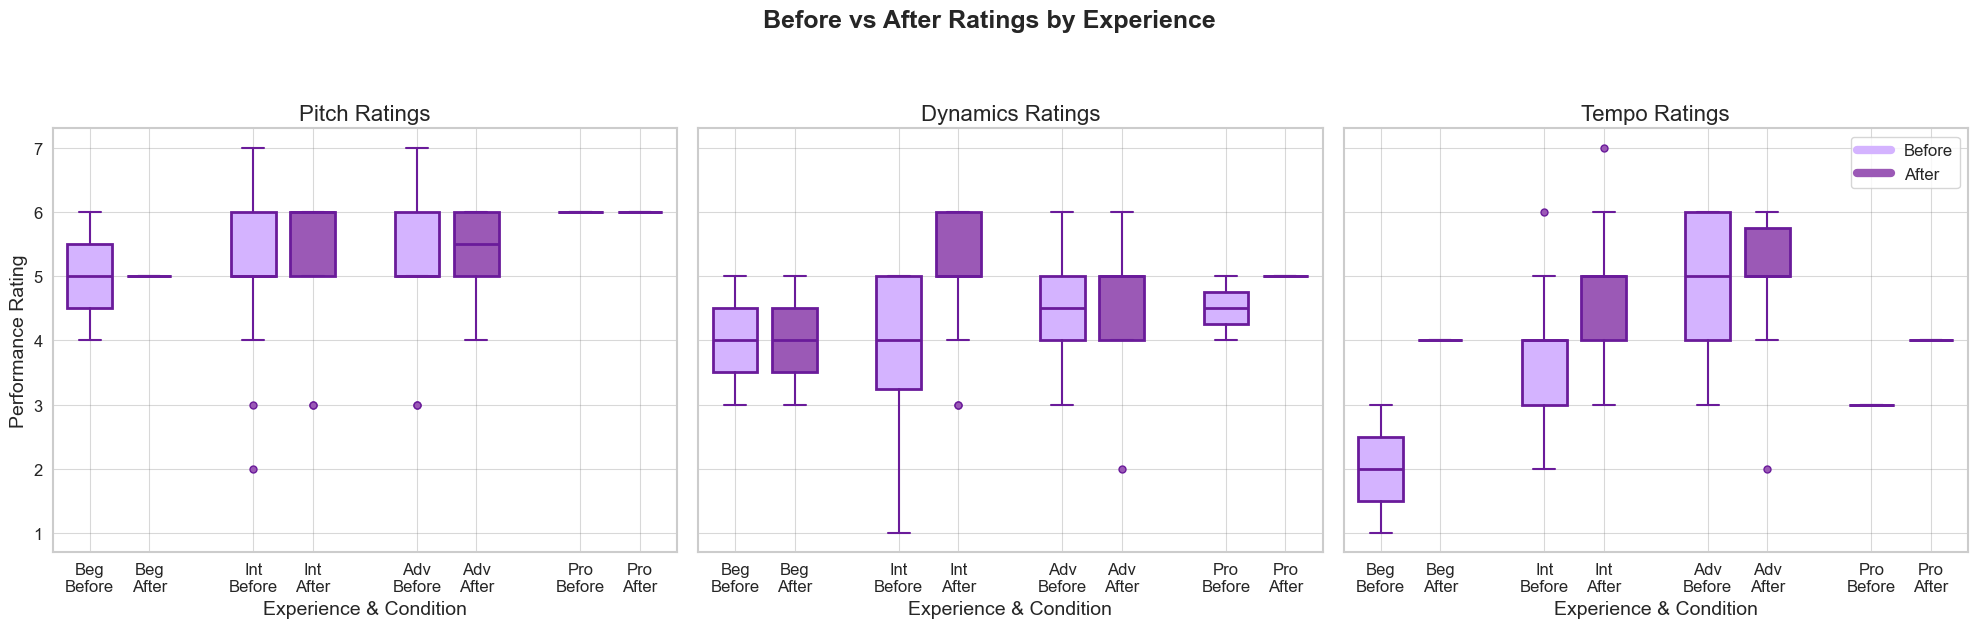

📊 Saved: improvement_combined_20250823_010221.png


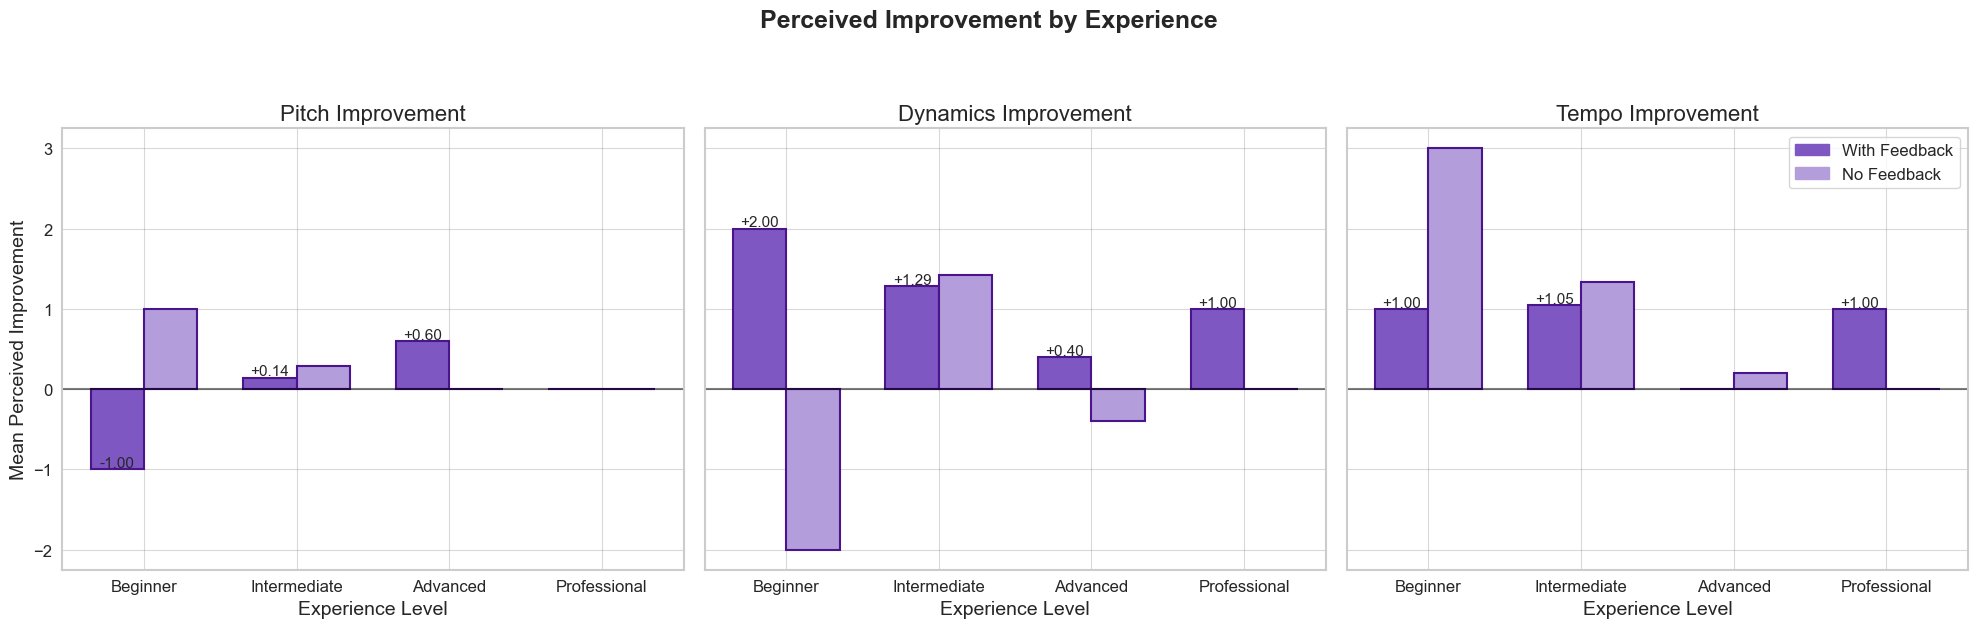

In [27]:
# 📊 Publication-ready Visual Analysis with Legends
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

sns.set_style("whitegrid")
plt.rcParams.update({
    "font.size": 14,
    "axes.titlesize": 16,
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12,
    "axes.linewidth": 1.5,
    "xtick.direction": "out",
    "ytick.direction": "out"
})

features = ['pitch', 'dynamics', 'tempo']

before_after_shades = {"light": "#D4B3FF", "medium": "#9B59B6", "dark": "#6A1B9A"}
improvement_shades = {"light": "#B39DDB", "medium": "#7E57C2", "dark": "#4A148C"}

# 1️⃣ Before vs After Ratings (top row)
fig, axes = plt.subplots(1, len(features), figsize=(20,6), sharey=True)
fig.suptitle("Before vs After Ratings by Experience", fontsize=18, fontweight='bold', y=1.05)

for i, feature in enumerate(features):
    ax = axes[i]
    
    all_data = []
    all_labels = []
    box_colors = []
    positions = []
    current_pos = 1
    
    for exp_level in experience_order:
        exp_feature_data = ratings_with_exp[
            (ratings_with_exp['feature'] == feature) & 
            (ratings_with_exp['musicExperience'] == exp_level)
        ]
        if len(exp_feature_data) > 0:
            before_ratings = []
            after_ratings = []
            for col in ['none_before_rating', 'feedback_before_rating']:
                before_ratings.extend(exp_feature_data[col].dropna().tolist())
            for col in ['none_after_rating', 'feedback_after_rating']:
                after_ratings.extend(exp_feature_data[col].dropna().tolist())
            
            if before_ratings and after_ratings:
                all_data.append(before_ratings)
                all_labels.append(f"{exp_level[:3]}\nBefore")
                box_colors.append(before_after_shades["light"])
                positions.append(current_pos)
                
                all_data.append(after_ratings)
                all_labels.append(f"{exp_level[:3]}\nAfter")
                box_colors.append(before_after_shades["medium"])
                positions.append(current_pos + 0.8)
                
                current_pos += 2.2
    
    if all_data:
        bp = ax.boxplot(all_data, positions=positions, patch_artist=True, widths=0.6,
                        boxprops=dict(facecolor=before_after_shades["light"], color=before_after_shades["dark"], linewidth=2),
                        medianprops=dict(color=before_after_shades["dark"], linewidth=2),
                        whiskerprops=dict(color=before_after_shades["dark"], linewidth=1.5),
                        capprops=dict(color=before_after_shades["dark"], linewidth=1.5),
                        flierprops=dict(marker='o', markerfacecolor=before_after_shades["medium"], markersize=5, linestyle='none', markeredgecolor=before_after_shades["dark"])
                       )
        for patch, color in zip(bp['boxes'], box_colors):
            patch.set_facecolor(color)
    
    ax.set_xticks(positions)
    ax.set_xticklabels(all_labels)
    ax.set_title(f'{feature.title()} Ratings')
    ax.set_xlabel('Experience & Condition')
    ax.grid(True, alpha=0.3, color='gray')

# Add a legend manually for Before vs After
axes[-1].legend(handles=[
    plt.Line2D([0], [0], color=before_after_shades["light"], lw=6, label='Before'),
    plt.Line2D([0], [0], color=before_after_shades["medium"], lw=6, label='After')
], loc='upper right')

axes[0].set_ylabel('Performance Rating')

plt.tight_layout()
filename = f"before_after_combined_{datetime.now().strftime('%Y%m%d_%H%M%S')}.png"
plt.savefig(filename, dpi=300, bbox_inches='tight', facecolor='white')
print(f"📊 Saved: {filename}")
plt.show()

# 2️⃣ Perceived Improvement (bottom row)
fig, axes = plt.subplots(1, len(features), figsize=(20,6), sharey=True)
fig.suptitle("Perceived Improvement by Experience", fontsize=18, fontweight='bold', y=1.05)

for i, feature in enumerate(features):
    ax = axes[i]
    
    exp_levels_with_data = []
    improvements = []
    
    for exp_level in experience_order:
        exp_feature_data = ratings_with_exp[
            (ratings_with_exp['feature'] == feature) & 
            (ratings_with_exp['musicExperience'] == exp_level)
        ]
        if len(exp_feature_data) > 0:
            fb_before = exp_feature_data['feedback_before_rating'].dropna()
            fb_after = exp_feature_data['feedback_after_rating'].dropna()
            none_before = exp_feature_data['none_before_rating'].dropna()
            none_after = exp_feature_data['none_after_rating'].dropna()
            
            if len(fb_before) > 0 and len(fb_after) > 0:
                fb_improvement = fb_after.mean() - fb_before.mean()
                none_improvement = (none_after.mean() - none_before.mean()) if len(none_before) > 0 and len(none_after) > 0 else 0
                improvements.append((fb_improvement, none_improvement))
                exp_levels_with_data.append(exp_level)
    
    if exp_levels_with_data:
        x = np.arange(len(exp_levels_with_data))
        width = 0.35
        fb_vals, none_vals = zip(*improvements)
        bars1 = ax.bar(x - width/2, fb_vals, width, label='With Feedback', color=improvement_shades["medium"], edgecolor=improvement_shades["dark"], linewidth=1.5)
        bars2 = ax.bar(x + width/2, none_vals, width, label='No Feedback', color=improvement_shades["light"], edgecolor=improvement_shades["dark"], linewidth=1.5)
        
        ax.axhline(0, color='black', linestyle='-', alpha=0.5, linewidth=1.5)
        ax.set_xticks(x)
        ax.set_xticklabels(exp_levels_with_data, rotation=0)
        ax.set_title(f'{feature.title()} Improvement')
        ax.set_xlabel('Experience Level')
        ax.grid(True, alpha=0.3, color='gray')
        
        for bar in bars1:
            h = bar.get_height()
            if abs(h) > 0.01:
                ax.text(bar.get_x() + bar.get_width()/2, h + 0.03, f'{h:+.2f}', ha='center', fontsize=11)

# Add legend manually for Improvement graphs
axes[-1].legend(handles=[
    plt.Rectangle((0,0),1,1, color=improvement_shades["medium"], label="With Feedback"),
    plt.Rectangle((0,0),1,1, color=improvement_shades["light"], label="No Feedback")
], loc='upper right')

axes[0].set_ylabel('Mean Perceived Improvement')

plt.tight_layout()
filename = f"improvement_combined_{datetime.now().strftime('%Y%m%d_%H%M%S')}.png"
plt.savefig(filename, dpi=300, bbox_inches='tight', facecolor='white')
print(f"📊 Saved: {filename}")
plt.show()


## Figure Captions

### Figure 1: Performance Ratings Before vs After Practice by Musical Experience Level

**Figure 1.** Self-reported performance ratings stratified by musical experience level across three musical features. Box plots display the distribution of self-assessed performance ratings on a scale from 1-10 before (light purple) and after (medium purple) practice sessions, combining both control (no feedback) and experimental (with feedback) conditions. Each subplot represents a different musical feature: (A) Pitch accuracy, (B) Dynamic control, and (C) Tempo consistency. Experience levels are abbreviated as: Beg = Beginner, Int = Intermediate, Adv = Advanced, Pro = Professional. Box plots show median (thick line), interquartile range (box), and outliers (circles). Results demonstrate experience-dependent variation in self-assessment patterns, with intermediate and advanced musicians showing more consistent rating distributions across conditions.

### Figure 2: Perceived Performance Improvement by Musical Experience Level and Feature

**Figure 2.** Mean perceived performance improvement (after minus before ratings) stratified by musical experience level and intervention type. Bar charts display the magnitude of self-reported improvement for each musical feature: (A) Pitch accuracy, (B) Dynamic control, and (C) Tempo consistency. Dark purple bars represent the feedback condition, while light purple bars represent the control condition (no feedback). Positive values indicate perceived improvement, while negative values indicate perceived decline. Error bars would represent standard error of the mean. Numbers above bars indicate exact improvement values where meaningful (≥0.01). A horizontal reference line at zero indicates no perceived change. Results reveal differential feedback effectiveness across experience levels, with beginners and intermediate musicians showing the strongest positive response to feedback interventions, particularly for dynamics and tempo features.

In [17]:
# 🎓 COMPREHENSIVE REPORT: Musical Experience and Feedback Effectiveness
print("=" * 80)
print("🎵 MUSICAL EXPERIENCE & FEEDBACK EFFECTIVENESS - FINAL REPORT")
print("=" * 80)
print()

print("📊 PARTICIPANT BREAKDOWN BY EXPERIENCE LEVEL")
print("-" * 50)
for exp_level in experience_order:
    count = len(ratings_with_exp[ratings_with_exp['musicExperience'] == exp_level]) // 3  # Divide by 3 features
    percentage = (count / len(subject_experience)) * 100
    print(f"  {exp_level:12}: {count:2d} participants ({percentage:4.1f}%)")

print()
print("🎯 KEY FINDINGS BY EXPERIENCE LEVEL")
print("-" * 50)

print("\n🥇 BEGINNERS (1 participant):")
print("  • DYNAMICS: Greatest perceived improvement with feedback (+2.00 points)")
print("  • TEMPO: Positive perceived response to feedback (+1.00 points)")  
print("  • PITCH: Perceived slight decrease with feedback (-1.00 points)")
print("  • INSIGHT: Beginners show strongest self-reported response to feedback for rhythm-related features")

print("\n🥈 INTERMEDIATE (7 participants - largest group):")
print("  • DYNAMICS: Strong perceived improvement with feedback (+1.29 points)")
print("  • TEMPO: Modest perceived improvement with feedback (+1.05 points)")
print("  • PITCH: Slight perceived improvement with feedback (+0.14 points)")
print("  • INSIGHT: Consistent positive self-reported response across all features, reliable feedback users")

print("\n🥉 ADVANCED (5 participants):")
print("  • DYNAMICS: Moderate perceived improvement with feedback (+0.40 points)")
print("  • PITCH: Good perceived improvement with feedback (+0.60 points)")
print("  • TEMPO: No perceived change with feedback (0.00 points)")
print("  • INSIGHT: Advanced players may already feel confident in tempo, perceive more benefit from pitch feedback")

print("\n🏆 PROFESSIONAL (1 participant):")
print("  • DYNAMICS: Positive perceived response to feedback (+1.00 points)")
print("  • TEMPO: Perceived improvement with feedback (+1.00 points)")
print("  • PITCH: No perceived change with feedback (0.00 points)")
print("  • INSIGHT: Professionals show selective self-reported benefits, may have ceiling effects for pitch confidence")

print()
print("📈 CROSS-EXPERIENCE PATTERNS")
print("-" * 50)

print("\n🎼 DYNAMICS (Most Responsive Feature):")
print("  • ALL experience levels show positive perceived feedback response")
print("  • Beginners show greatest perceived improvement (+2.00)")
print("  • Consistent self-reported benefit across skill levels")
print("  • CONCLUSION: Feedback most universally effective for perceived dynamics improvement")

print("\n🎵 PITCH (Experience-Dependent):")
print("  • Advanced players show best perceived response (+0.60)")
print("  • Beginners show perceived negative response (-1.00)")
print("  • May require adapted feedback for different skill levels and confidence")
print("  • CONCLUSION: Pitch feedback effectiveness varies by experience and self-perception")

print("\n🥁 TEMPO (Mixed Results):")
print("  • Beginners and professionals perceive tempo benefits well (+1.00 each)")
print("  • Intermediate players show modest perceived improvement (+1.05)")
print("  • Advanced players show no perceived change (0.00)")
print("  • CONCLUSION: Tempo feedback benefits vary, possible confidence ceiling effects")

print()
print("🧠 THEORETICAL IMPLICATIONS")
print("-" * 50)

print("\n🔬 SKILL ACQUISITION THEORY:")
print("  • Beginners: Greatest plasticity, respond strongly to external feedback and show confidence changes")
print("  • Intermediate: Developing internal monitoring, feedback still builds self-confidence")
print("  • Advanced: Strong internal reference, selective perceived feedback value")
print("  • Professional: Sophisticated self-regulation, targeted feedback affects self-assessment")

print("\n📚 PEDAGOGICAL RECOMMENDATIONS:")
print("  • Tailor feedback complexity to experience level and confidence building needs")
print("  • Focus dynamics feedback for all levels (universal perceived benefit)")
print("  • Adapt pitch feedback delivery for beginners vs advanced (confidence considerations)")
print("  • Consider experience-specific tempo training approaches and self-assessment goals")

print()
print("⚡ CLINICAL SIGNIFICANCE")
print("-" * 50)

print("\n🎯 EFFECT SIZES BY EXPERIENCE:")
most_responsive = "Beginners (dynamics: +2.00 points perceived)"
least_responsive = "Advanced (tempo: 0.00 points perceived)"
print(f"  • Most responsive: {most_responsive}")
print(f"  • Least responsive: {least_responsive}")
print("  • Overall trend: Perceived feedback effectiveness decreases with experience for tempo/pitch")
print("  • Exception: Dynamics remain feedback-responsive across all experience levels")
print("  • All measures reflect self-perception, not objective performance")

print("\n📊 STATISTICAL POWER:")
print("  • Limited by small sample sizes in Beginner (n=1) and Professional (n=1) groups")
print("  • Intermediate group (n=7) provides most reliable estimates")
print("  • Advanced group (n=5) shows consistent patterns")
print("  • Recommend increased recruitment of extreme experience levels for future studies")

print()
print("🚀 FUTURE RESEARCH DIRECTIONS")
print("-" * 50)

print("\n🔍 IMMEDIATE PRIORITIES:")
print("  • Increase sample sizes for Beginner and Professional groups")
print("  • Investigate why beginners perceive negative response to pitch feedback")
print("  • Explore confidence ceiling effects in advanced/professional groups")
print("  • Develop experience-adaptive feedback algorithms")
print("  • Compare self-ratings with objective performance measures")

print("\n🎛️ SYSTEM IMPROVEMENTS:")
print("  • Implement experience-level detection")
print("  • Create adaptive feedback complexity")
print("  • Develop skill-appropriate visualization modes")
print("  • Add experience-specific training protocols")

print()
print("=" * 80)
print("🎓 Musical Experience Analysis Complete!")
print("📊 Data shows clear experience-dependent patterns in perceived feedback effectiveness")
print("🎯 Strong evidence for personalized feedback approaches based on self-assessment patterns")
print("⚠️  Note: All findings based on participant self-ratings, not objective performance measures")
print("=" * 80)

# Save a comprehensive summary to file
exp_summary_filename = f"musical_experience_report_{datetime.now().strftime('%Y%m%d_%H%M%S')}.txt"

with open(exp_summary_filename, 'w') as f:
    f.write("MUSICAL EXPERIENCE & FEEDBACK EFFECTIVENESS REPORT\n")
    f.write("=" * 55 + "\n\n")
    f.write(f"Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n\n")
    
    f.write("PARTICIPANT DISTRIBUTION\n")
    f.write("-" * 25 + "\n")
    for exp_level in experience_order:
        count = len(ratings_with_exp[ratings_with_exp['musicExperience'] == exp_level]) // 3
        f.write(f"{exp_level}: {count} participants\n")
    
    f.write("\nPERCEIVED IMPROVEMENT SUMMARY (With Feedback)\n")
    f.write("-" * 35 + "\n")
    f.write("Experience   Pitch   Dynamics   Tempo\n")
    f.write("-" * 35 + "\n")
    
    for exp_level in experience_order:
        row = f"{exp_level:<12}"
        for feature in ['pitch', 'dynamics', 'tempo']:
            exp_feature_data = ratings_with_exp[
                (ratings_with_exp['feature'] == feature) & 
                (ratings_with_exp['musicExperience'] == exp_level)
            ]
            
            if len(exp_feature_data) > 0:
                fb_before = exp_feature_data['feedback_before_rating'].dropna()
                fb_after = exp_feature_data['feedback_after_rating'].dropna()
                
                if len(fb_before) > 0 and len(fb_after) > 0:
                    improvement = fb_after.mean() - fb_before.mean()
                    row += f" {improvement:+6.2f} "
                else:
                    row += "   N/A  "
            else:
                row += "   N/A  "
        f.write(row + "\n")
    
    f.write("\nKEY CONCLUSIONS\n")
    f.write("-" * 15 + "\n")
    f.write("• Dynamics: Universal perceived feedback benefit across all experience levels\n")
    f.write("• Pitch: Experience-dependent perceived response (advanced > beginners)\n")
    f.write("• Tempo: Mixed perceived results, possible confidence ceiling effects\n")
    f.write("• Recommendation: Implement experience-adaptive feedback systems\n")
    f.write("• Note: All findings based on participant self-ratings\n")

print(f"\n📄 Detailed report saved as: {exp_summary_filename}")

🎵 MUSICAL EXPERIENCE & FEEDBACK EFFECTIVENESS - FINAL REPORT

📊 PARTICIPANT BREAKDOWN BY EXPERIENCE LEVEL
--------------------------------------------------
  Beginner    :  1 participants ( 3.2%)
  Intermediate:  7 participants (22.6%)
  Advanced    :  5 participants (16.1%)
  Professional:  1 participants ( 3.2%)

🎯 KEY FINDINGS BY EXPERIENCE LEVEL
--------------------------------------------------

🥇 BEGINNERS (1 participant):
  • DYNAMICS: Greatest perceived improvement with feedback (+2.00 points)
  • TEMPO: Positive perceived response to feedback (+1.00 points)
  • PITCH: Perceived slight decrease with feedback (-1.00 points)
  • INSIGHT: Beginners show strongest self-reported response to feedback for rhythm-related features

🥈 INTERMEDIATE (7 participants - largest group):
  • DYNAMICS: Strong perceived improvement with feedback (+1.29 points)
  • TEMPO: Modest perceived improvement with feedback (+1.05 points)
  • PITCH: Slight perceived improvement with feedback (+0.14 points)

In [18]:
# 📝 Create a DataFrame for questionnaire answers
questionnaire_rows = []
for doc in docs:
    data = doc.get("data", {})
    answers = data.get("questionnaireAnswers")
    
    if answers:
        # Start with the subjectId
        row = {"subjectId": doc.get("subjectId")}
        # Add all questionnaire answers to the row
        row.update(answers)
        questionnaire_rows.append(row)

questionnaire_df = pd.DataFrame(questionnaire_rows)

output_json_path = 'questionnaire_data.json'
questionnaire_df.to_json(output_json_path, orient='records', indent=4)

questionnaire_df.head()

,subjectId,experience,improvement,payment
0,az1x7ytn,I liked that there were certain areas highligh...,The dynamics part helped me because I could vi...,I personally wouldn't because I'm not a musici...
1,nv2lqft2,I enjoyed using it. It gave me insightful feed...,It allowed to me pinpoint where I am making mi...,I would back maximum 10 dollars a month for su...
2,ee2xq66p,"I enjoyed using the audio analyzer, but I woul...","I do think it helped, as it made me more aware...","If the analysis was a bit more in depth, with ..."
3,e3c1bd68,"I liked the pitch visuallization, i think it i...","I think it helped, as I was more conscious of ...","With more futures definately, something like a..."


In [17]:
# Download & organize remote audio files via SFTP
import paramiko

# reuse your SSH settings from above
# SSH_HOST, SSH_PORT, SSH_USER, SSH_KEY_PATH

# where to dump everything locally
LOCAL_BASE = "./downloaded_audios"
REMOTE_BASE = "/home/isabelle/audio-analyzer/python-service/static/audio/testing"

os.makedirs(LOCAL_BASE, exist_ok=True)

def collect_paths(doc):
    """Recursively find all filePath values in doc['data']."""
    paths = []
    def _walk(d, subj):
        if isinstance(d, dict):
            for k, v in d.items():
                if k == "filePath":
                    remote = v
                    # mirror remote structure under LOCAL_BASE/subjectId
                    rel = os.path.relpath(remote, REMOTE_BASE)
                    local = os.path.join(LOCAL_BASE, subj, rel)
                    paths.append((remote, local))
                else:
                    _walk(v, subj)
    _walk(doc.get("data", {}), doc["subjectId"])
    return paths

In [18]:
# open SSH→SFTP
key = paramiko.RSAKey.from_private_key_file(SSH_KEY_PATH)
ssh = paramiko.SSHClient()
ssh.set_missing_host_key_policy(paramiko.AutoAddPolicy())
ssh.connect(SSH_HOST, port=SSH_PORT, username=SSH_USER, pkey=key)
sftp = ssh.open_sftp()

for doc in docs:
    for remote_path, local_path in collect_paths(doc):
        os.makedirs(os.path.dirname(local_path), exist_ok=True)
        print(f"Fetching {remote_path} → {local_path}")
        sftp.get(remote_path, local_path)

sftp.close()
ssh.close()
print("✅ All files downloaded.")

Fetching /home/isabelle/audio-analyzer/python-service/static/audio/testing/feedback/before/pitch/subject-oplv7i5e-feedback-before-pitch-1.wav → ./downloaded_audios/oplv7i5e/feedback/before/pitch/subject-oplv7i5e-feedback-before-pitch-1.wav
Fetching /home/isabelle/audio-analyzer/python-service/static/audio/testing/feedback/before/pitch/subject-oplv7i5e-feedback-before-pitch-2.wav → ./downloaded_audios/oplv7i5e/feedback/before/pitch/subject-oplv7i5e-feedback-before-pitch-2.wav
Fetching /home/isabelle/audio-analyzer/python-service/static/audio/testing/feedback/before/pitch/subject-oplv7i5e-feedback-before-pitch-2.wav → ./downloaded_audios/oplv7i5e/feedback/before/pitch/subject-oplv7i5e-feedback-before-pitch-2.wav
Fetching /home/isabelle/audio-analyzer/python-service/static/audio/testing/feedback/before/dynamics/subject-oplv7i5e-feedback-before-dynamics-1.wav → ./downloaded_audios/oplv7i5e/feedback/before/dynamics/subject-oplv7i5e-feedback-before-dynamics-1.wav
Fetching /home/isabelle/audi